# Titanic Dataset Analysis

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning And Preprocessing

In [3]:
# Checking missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

In [5]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [6]:
# Converting categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].astype('category').cat.codes

In [7]:
df.drop(columns=['Cabin'], inplace=True)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
dtypes: float64(2), int64(6), int8(1), object(2)
memory usage: 70.6+ KB
None


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,0


# Exploratory Data Analysis

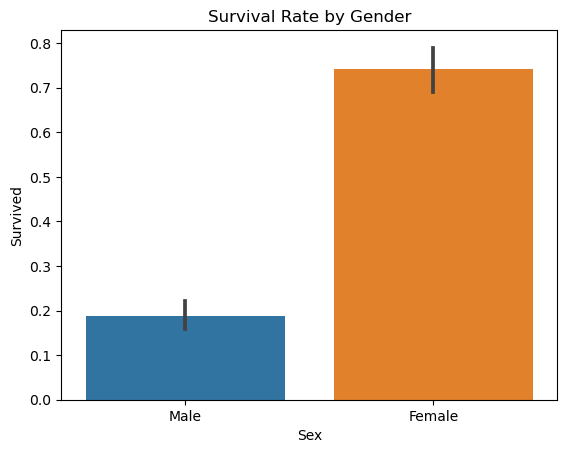

In [10]:
# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.title('Survival Rate by Gender')
plt.show()

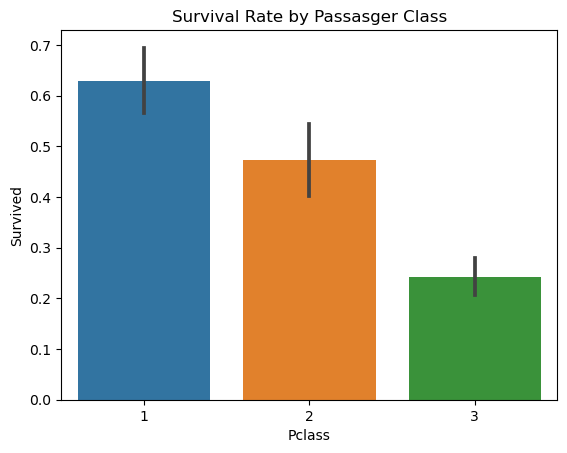

In [11]:
# Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.xticks(ticks=[0, 1, 2], label=['First', 'Second', 'Third'])
plt.title('Survival Rate by Passasger Class')
plt.show()

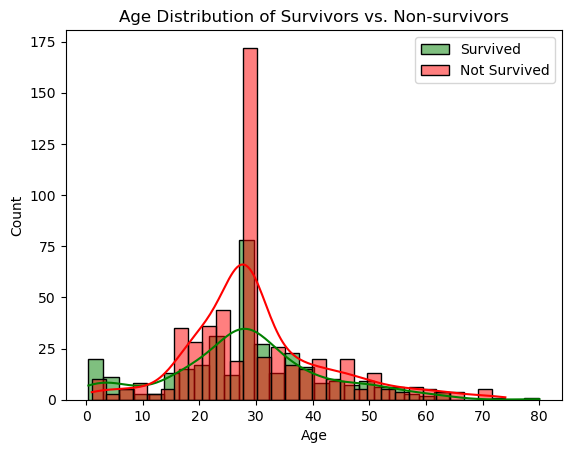

In [12]:
# Age Distribution of Survivors vs. Non-Survivors
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, color='red', label='Not Survived', kde=True)
plt.legend()
plt.title("Age Distribution of Survivors vs. Non-survivors")
plt.show()

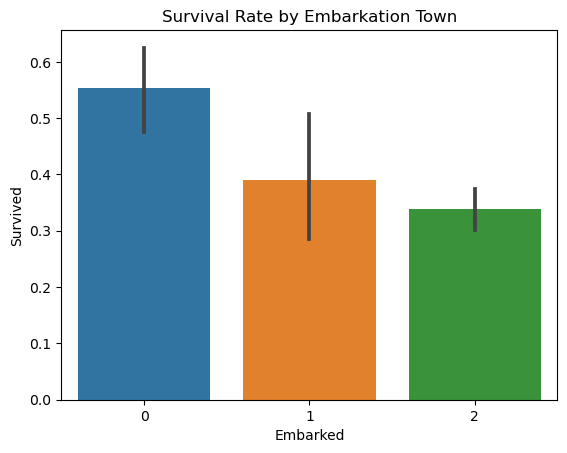

In [13]:
# Survival Rate by Embarkartion Town
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Town')
plt.show()

# Key Insights

Women had a higher survival rate than men.

First-class passengers had the highest survival rate, while third-class passengers had the lowest.

Younger passengers had a higher survival rate than older ones.

Embarkation location impacted survival, with certain ports showing better survival chances.